<img>
<html>
  <head>
  </head>

  <body>
    <img src="image/churn.jpg">
  </body>
</html>

# **About Dataset**
### Context
With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. It is stated that the cost of acquiring a new customer is far more than that for retaining the existing one. Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.
### Content
This data set contains customer level information for a telecom company. Various attributes related to the services used are recorded for each customer.
**The data set includes information about:**

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

---
- About the Author : Sajjad Ali Shah
- Contact: [Linkedin](www.linkedin.com/in/sajjad-ali-shah-120341305)

- Date : 26/09/2024
- Dataset: [Link](https://www.kaggle.com/datasets/barun2104/telecom-churn/data)
---

In [280]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


- ### Load the dataset

In [281]:
df = pd.read_csv("./dataset/telecom_churn.csv")

In [282]:
# Show first five datasets
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [284]:
df.shape

(3333, 11)

In [285]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [286]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [287]:
df.duplicated().sum()

0

In [288]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

---
<p><span style="color: orange; font-size: 350%; font-weight: bold;">Explore Data</span></p>

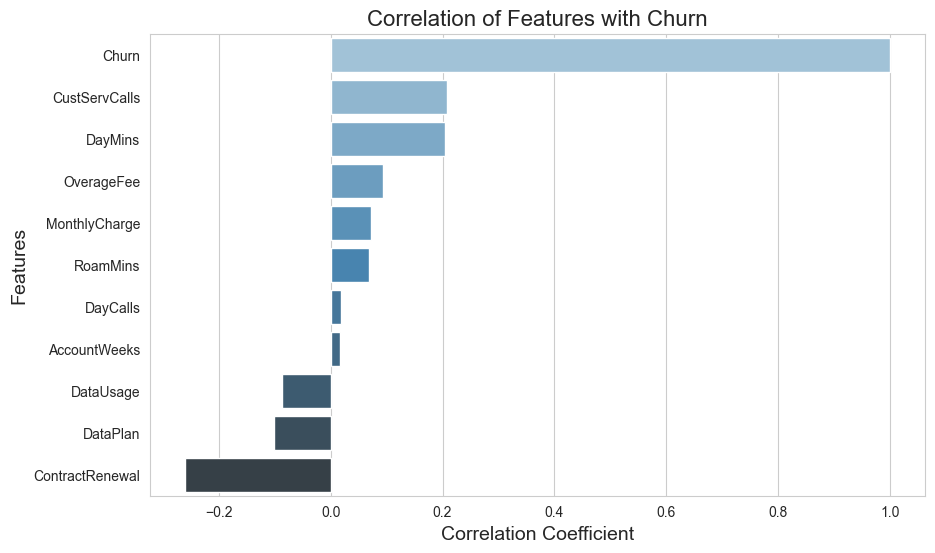

In [320]:
# Calculate correlation with the target variable 'Churn'
corr_with_churn = df.corr(numeric_only=True)["Churn"].dropna().sort_values(ascending=False)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_churn.values, y=corr_with_churn.index, palette="Blues_d")

plt.title('Correlation of Features with Churn', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.show()


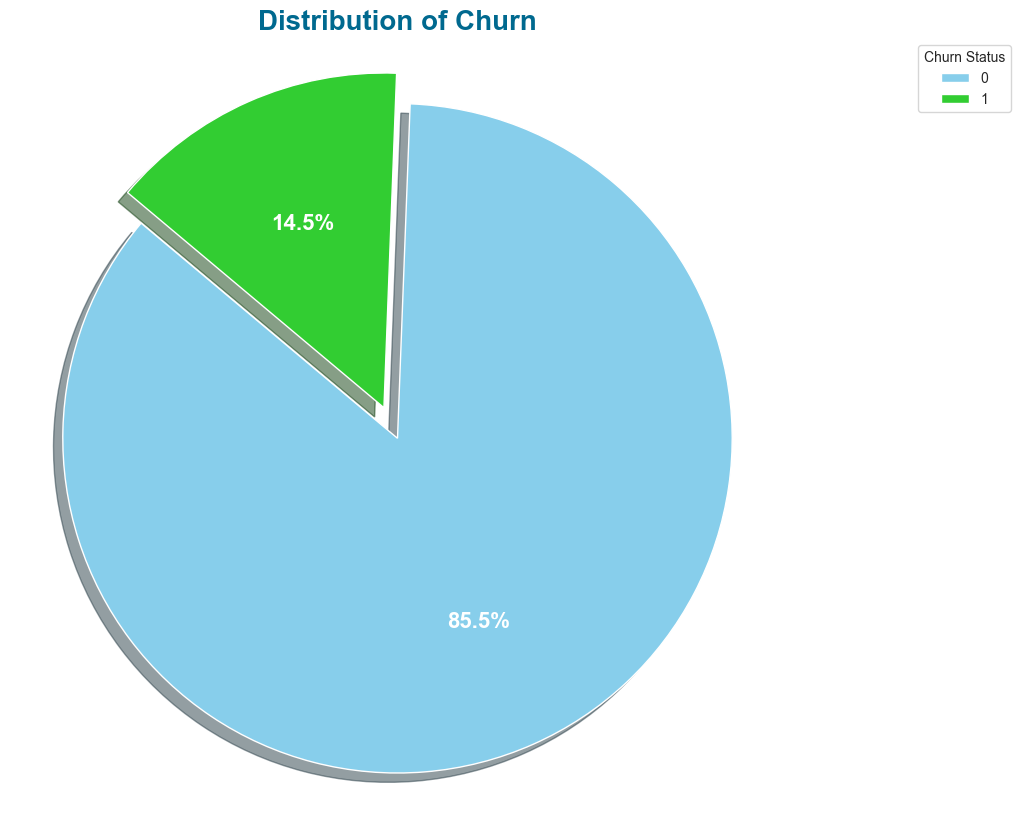

In [322]:
labels = df['Churn'].value_counts().index
sizes = df['Churn'].value_counts().values

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, 
        textprops={'fontsize': 16, 'fontweight': 'bold', 'color': 'white'},
        colors=['#87CEEB', '#32CD32'], explode=[0.1, 0], shadow=True)
plt.title('Distribution of Churn', fontsize=20, fontweight='bold', color='#00698f')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Churn Status', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

<Axes: xlabel='DataPlan', ylabel='count'>

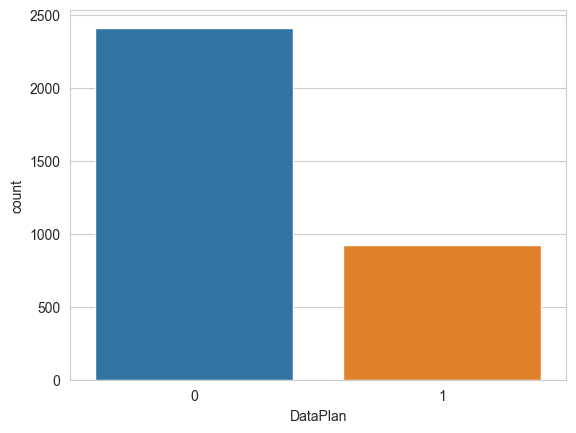

In [323]:
sns.countplot(data=df, x='DataPlan', palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

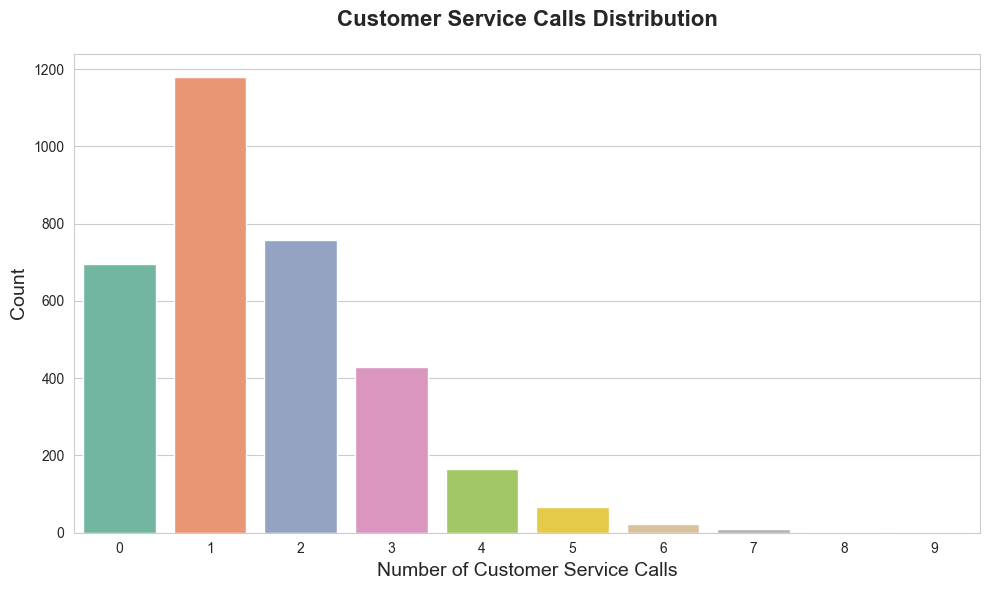

In [315]:
# Set a larger figure size
plt.figure(figsize=(10, 6))

# Create the countplot with a refined color palette
sns.countplot(data=df, x='CustServCalls', palette='Set2')

# Add a title and labels with minimal styling
plt.title('Customer Service Calls Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Customer Service Calls', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


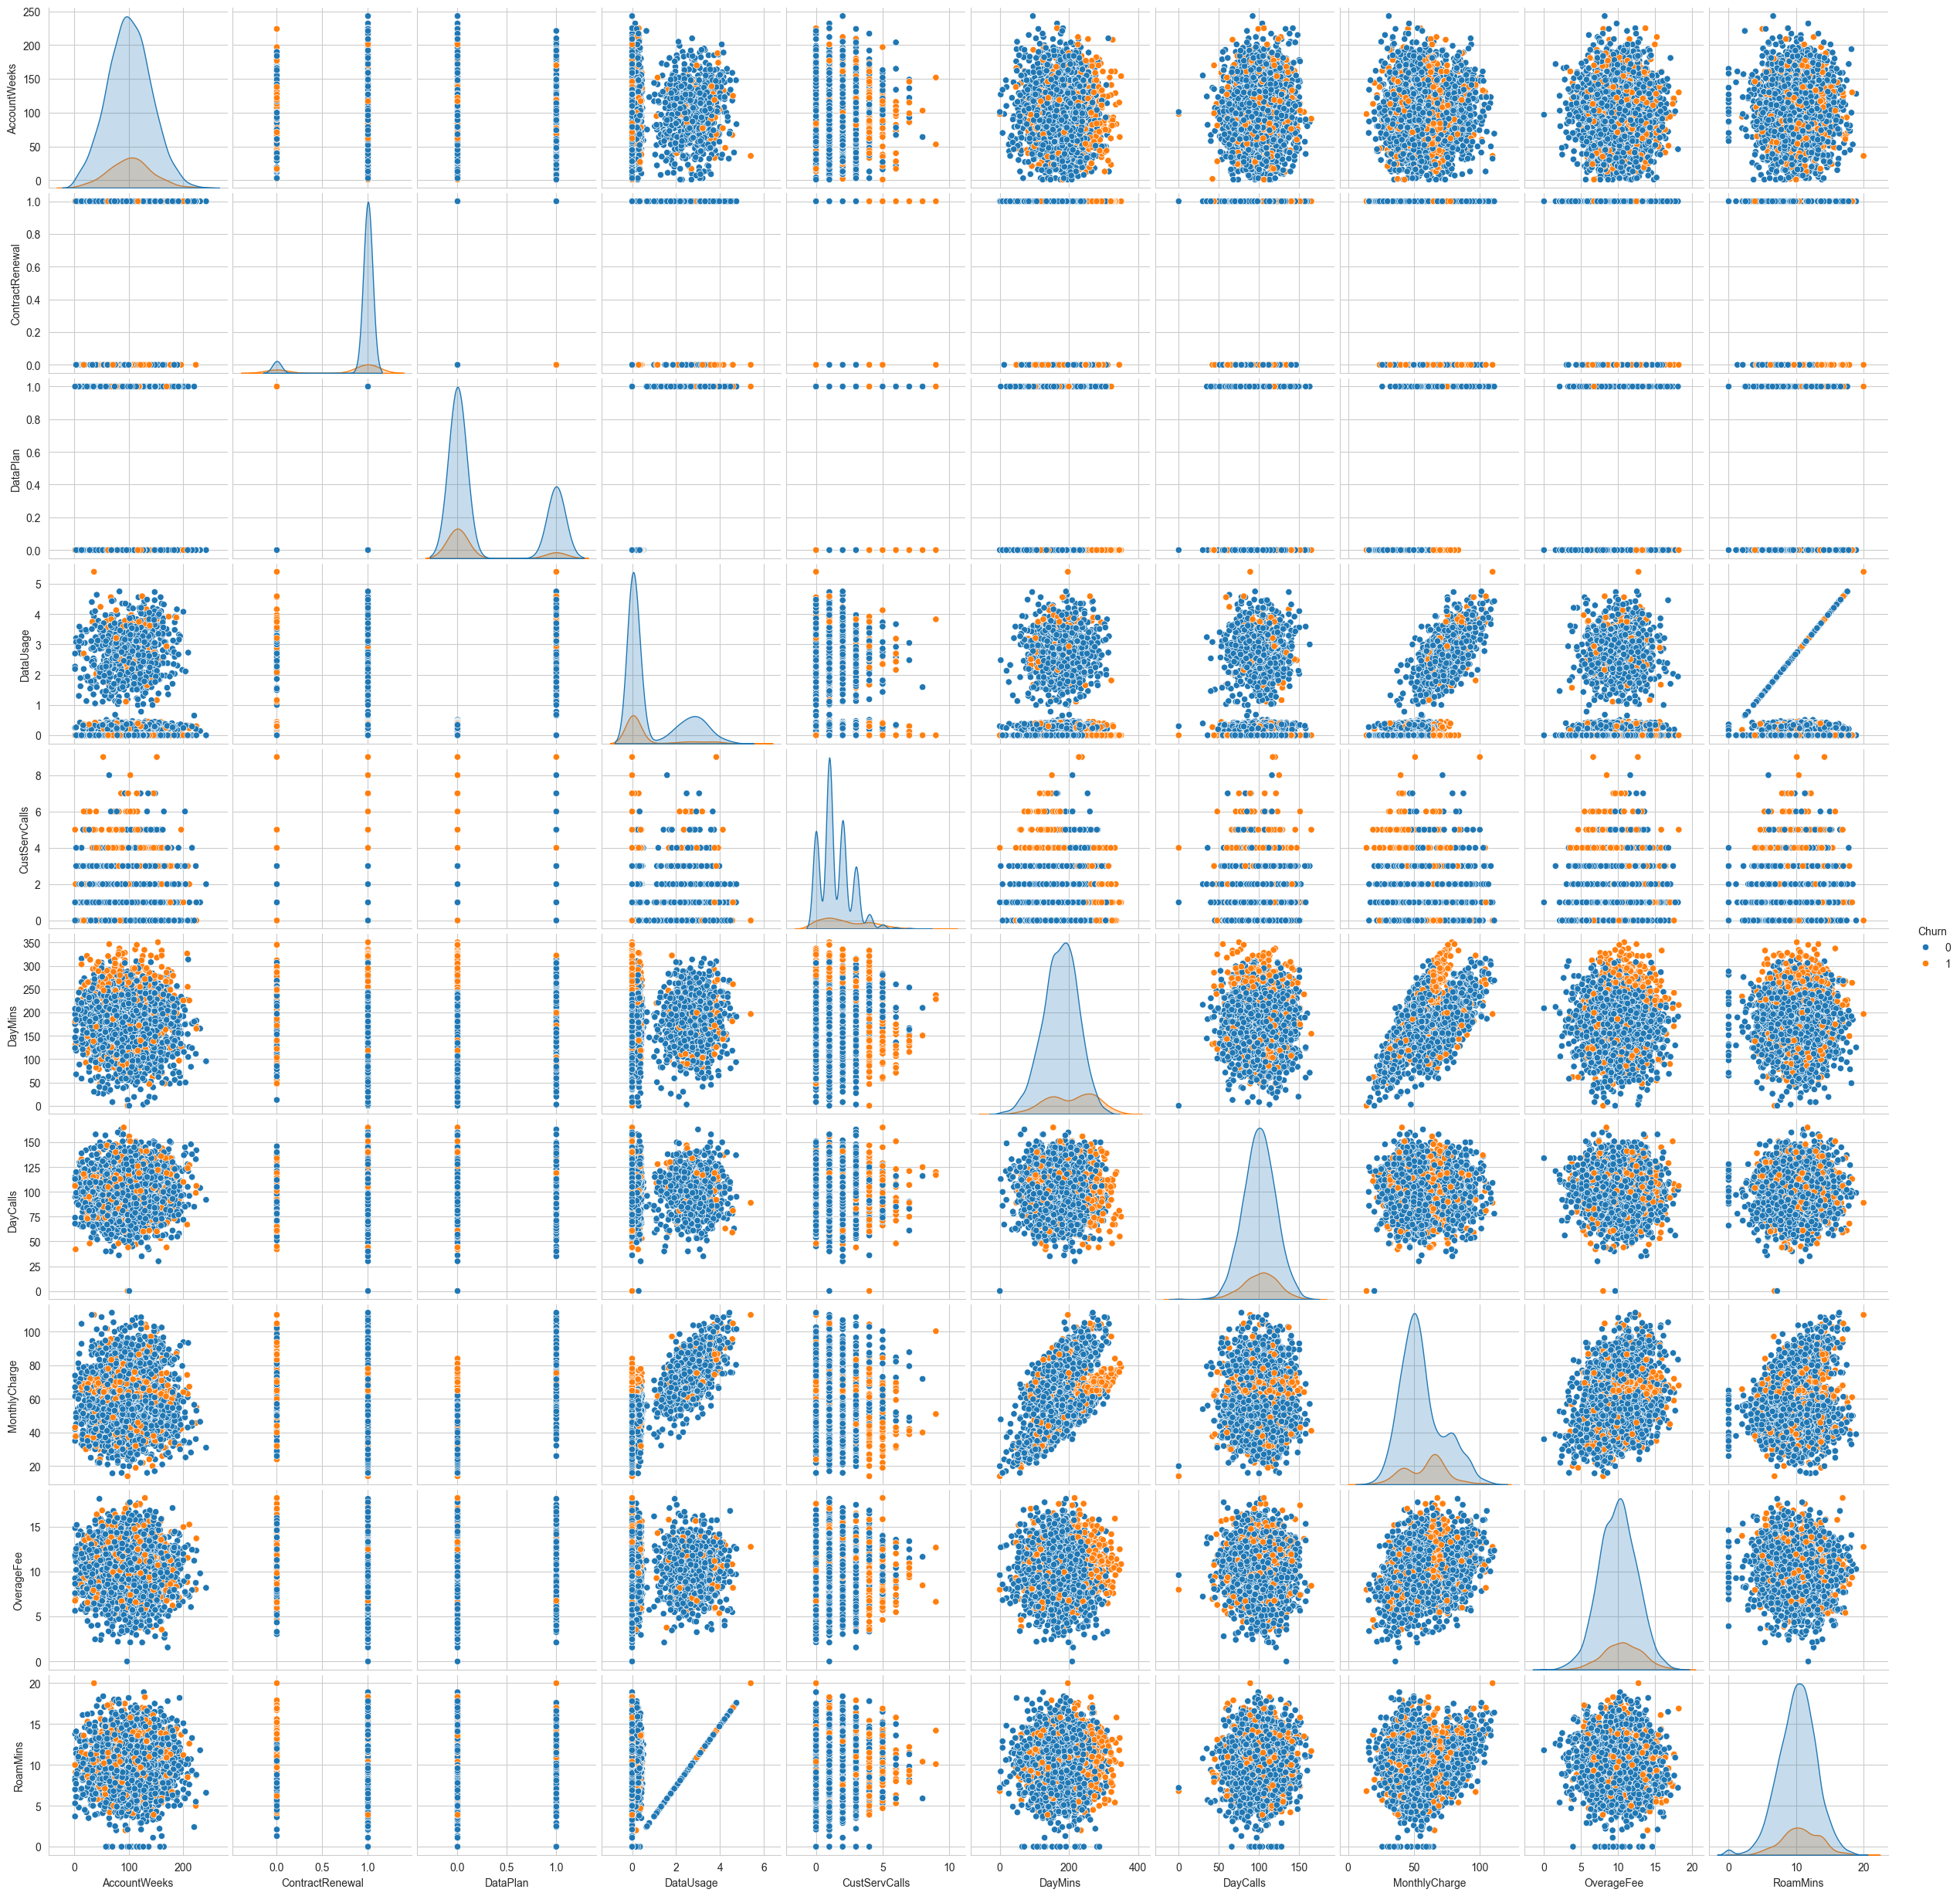

In [316]:
sns.pairplot(df,hue="Churn")

---
<p><span style="color: orange; font-size: 350%; font-weight: bold;">Machine Learning</span></p>

In [307]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score, precision_score, recall_score, f1_score


X = df.drop(['Churn'],axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [308]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [309]:
# Create the model
model = LogisticRegression()

# Train the model on the training data (X_train and y_train)
model.fit(X_train,y_train)

# Use the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))
print('mean_squared_error',mean_squared_error(y_test,y_pred))

R2 score -0.17752659574468121
MAE score 0.14636363636363636
mean_squared_error 0.14636363636363636


In [310]:
# Model Building
# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Train and validate the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [311]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

Accuracy: 0.9336363636363636, Precision: 0.8782608695652174, Recall: 0.63125, F1-Score: 0.7345454545454545


In [312]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [313]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [314]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Optimized Model - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

Optimized Model - Accuracy: 0.9363636363636364, Precision: 0.9017857142857143, Recall: 0.63125, F1-Score: 0.7426470588235294
